# Stock Market Prediciton Models



## Write Your Name Here: Ajmal Amir

# <font color="blue"> The Code start from here</font>



In [1]:
import numpy as np
from scipy.sparse import coo_matrix
from numpy.random import randn, randint
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import torch

# import utils

np.random.seed(1)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Predictive Model for Stock Market Investments:

1. we need allow the tick to be as user input
2. the date range should also be as input
3. the predition durration should alos be as user input. 

In [8]:
import yfinance as yf

# Fetch historical data
stock_data = yf.download("AAPL", start="2015-01-01", end="2025-01-01")
stock_data = stock_data[['Close']]  # Focus on 'Close' prices
stock_data.dropna(inplace=True)  # Remove missing values

print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Close, AAPL)]
Index: []


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(stock_data['Close'], order=(5, 1, 0))  # Adjust (p, d, q)
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=30)  # Predict next 30 days
print(forecast)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn(

LinAlgError: Schur decomposition solver error.

In [8]:
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data)

# Create sequences
sequence_length = 60  # Use 60 days of data to predict the next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict
predictions = model.predict(X)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0209
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.6752e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8672e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1287e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7174e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2268e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2119e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7287e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8301e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6061e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


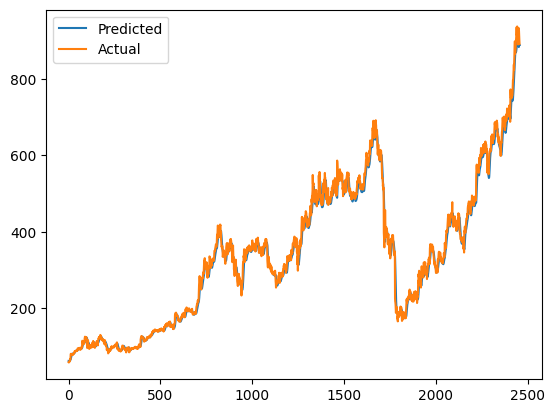

In [9]:
# Plot results
plt.plot(scaler.inverse_transform(predictions), label='Predicted')
plt.plot(scaler.inverse_transform(y.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()

In [23]:
%%writefile stock_predictionfmp.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import snscrape.modules.twitter as sntwitter
# from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to convert company name to ticker
def get_ticker_from_name(company_name):
    try:
        search_results = yf.search_tickers(company_name)
        if search_results and "symbol" in search_results[0]:
            return search_results[0]["symbol"]  # Return the best matching ticker
        else:
            return None
    except:
        return None

# Streamlit UI
st.title("Stock Market Prediction Using Machine Learning")
st.sidebar.header("User Input Parameters")

ticker_or_name = st.sidebar.text_input("Enter Stock Ticker or Company Name", "TSLA")
start_date = st.sidebar.date_input("Select Start Date", pd.to_datetime("2023-01-01"))
end_date = st.sidebar.date_input("Select End Date", pd.to_datetime("2025-01-01"))
prediction_days = st.sidebar.slider("Prediction Duration (Days)", 1, 60, 30)

graph_options = ["Line Graph", "Bar Graph", "Scatter Plot"]
selected_graph = st.sidebar.selectbox("Choose a Graph Type", graph_options)



# Convert company name to ticker if needed
if len(ticker_or_name) > 1 and not ticker_or_name.isupper():
    ticker = get_ticker_from_name(ticker_or_name)
    if not ticker:
        st.error("Invalid company name. Please enter a valid stock ticker or company name.")
        st.stop()
else:
    ticker = ticker_or_name

# Function for Twitter Sentiment Analysis
# def get_twitter_sentiment(query, num_tweets=100):
#     tweets = []
#     for tweet in sntwitter.TwitterSearchScraper(f'{query} lang:en').get_items():
#         if len(tweets) >= num_tweets:
#             break
#         tweets.append(tweet.content)
    
#     sentiment_scores = []
#     for tweet in tweets:
#         sentiment = TextBlob(tweet).sentiment.polarity
#         sentiment_scores.append(sentiment)
    
#     avg_sentiment = np.mean(sentiment_scores) if sentiment_scores else 0
#     return avg_sentiment


# Fetch Stock Data
st.write(f"Fetching historical data for {ticker}...")
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Ensure all columns are numeric
stock_data = stock_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
stock_data.dropna(inplace=True)

# Check if the dataframe is empty after cleaning
if stock_data.empty:
    st.error("Stock data is empty after preprocessing. Please try another ticker or date range.")
    st.stop()

st.write(stock_data.head())

# Data Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Test Multiple Models
models = {
    "Artificial Neural Network (ANN)": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ]),
    "K-Nearest Neighbor (k-NN)": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Machine (SVM)": SVR(kernel='rbf'),
    "Decision Tree (C4.5)": DecisionTreeRegressor(),
    "Random Forest (RF)": RandomForestRegressor(n_estimators=100),
    "Bagging": BaggingRegressor(n_estimators=50),
    "AdaBoost": AdaBoostRegressor(n_estimators=50)
}

predictions = {}
accuracies = {}
for model_name, model in models.items():
    st.write(f"Training {model_name}...")
    if model_name == "Artificial Neural Network (ANN)":
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)
    pred = model.predict(X_test).flatten()
    predictions[model_name] = pred
    
    # Calculate accuracy metrics
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    accuracies[model_name] = {
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R2 Score": round(r2, 4)
    }

# Plot Results for Each Model Separately
for model_name, pred in predictions.items():
    st.write(f"### {model_name} Predictions vs Actual")
    st.write(f"**Understanding the Prediction:** This model analyzes past stock data and tries to predict future trends. The accuracy varies depending on the algorithm and market conditions.")
    st.write("These metrics help us understand how close the predictions are to the actual prices. Lower MAE and MSE values indicate better predictions, while an R² score closer to 1 means the model fits the data well.")

    # Assuming 'accuracies' is a dictionary containing your metrics
    mae = accuracies[model_name]['MAE']
    mse = accuracies[model_name]['MSE']
    r2 = accuracies[model_name]['R2 Score']
    
    # Create a Markdown string for the unordered list
    accuracy_list = f"""
    **Model Accuracy:**
    - **Mean Absolute Error (MAE):** {mae}
    - **Mean Squared Error (MSE):** {mse}
    - **R² Score:** {r2}
    """
    
    # Display the unordered list
    st.markdown(accuracy_list)

    
    fig, ax = plt.subplots()
    if selected_graph == "Line Graph":
        ax.plot(y_test, label='Actual', color='black')
        ax.plot(pred, label=f'{model_name} Predictions', linestyle='dashed', color='red')
    elif selected_graph == "Bar Graph":
        ax.bar(range(len(y_test)), y_test, label='Actual', color='black', alpha=0.6)
        ax.bar(range(len(pred)), pred, label=f'{model_name} Predictions', alpha=0.6, color='red')
    elif selected_graph == "Scatter Plot":
        ax.scatter(range(len(y_test)), y_test, label='Actual', color='black')
        ax.scatter(range(len(pred)), pred, label=f'{model_name} Predictions', color='red')
    
    ax.set_xlabel("Days")
    ax.set_ylabel("Stock Price")
    ax.set_title(f"{model_name} Prediction Performance over {len(y_test)} days")
    ax.legend()
    st.pyplot(fig)
# Placeholder for Twitter Sentiment Analysis
# st.write("### Twitter Sentiment Analysis (Coming Soon)")
# st.write("Sentiment analysis of social media data to predict stock trends will be integrated in the future.")

# Perform Twitter Sentiment Analysis
# st.write(f"Fetching Twitter sentiment analysis for {ticker_or_name}...")
# sentiment_score = get_twitter_sentiment(ticker_or_name)
# if sentiment_score > 0:
#     sentiment_result = "Positive"
# elif sentiment_score < 0:
#     sentiment_result = "Negative"
# else:
#     sentiment_result = "Neutral"
# st.write(f"**Twitter Sentiment Score:** {sentiment_score:.4f} ({sentiment_result})")

Overwriting stock_predictionfmp.py


## Below is the working code for the project

In [186]:
%%writefile stock_predictionfmp.py
import os
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dotenv import load_dotenv
from streamlit_navigation_bar import st_navbar


# Function to fetch stock data from FMP API
def fetch_stock_data(symbol, start_date, end_date, api_key):
    base_url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}"
    params = {
        "from": start_date,
        "to": end_date,
        "apikey": api_key
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    if "historical" in data:
        df = pd.DataFrame(data["historical"])
        df = df[["date", "open", "high", "low", "close", "volume"]]
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        return df
    else:
        return pd.DataFrame()

# Streamlit UI
st.set_page_config(page_title="StockMarketIQ", page_icon="logo.png", layout="wide")

# import streamlit as st
# from streamlit_navigation_bar import st_navbar

# selected_page = st_navbar(
#     ["Home", "About", "Contact"],
#     # sticky=True,
#     styles={
#         "nav_color": "#2c3e50",
#         "nav_text_color": "#ecf0f1",
#         "nav_text_hover_color": "#3498db",
#         "nav_selected_color": "#2980b9",
#         "nav_selected_text_color": "#ffffff",
#     },
#     key="navbar",
# )


# Display the selected page
# st.write(f"You selected: {selected_page}")




st.title("Stock Market Prediction Using Machine Learning")
st.sidebar.header("User Input Parameters")

# Top 20 U.S. companies by market capitalization
top_companies = {
    "Apple Inc. (AAPL)": "AAPL",
    "Microsoft Corporation (MSFT)": "MSFT",
    "Amazon.com, Inc. (AMZN)": "AMZN",
    "Alphabet Inc. Class A (GOOGL)": "GOOGL",
    "Alphabet Inc. Class C (GOOG)": "GOOG",
    "Berkshire Hathaway Inc. (BRK.B)": "BRK.B",
    "NVIDIA Corporation (NVDA)": "NVDA",
    "Meta Platforms, Inc. (META)": "META",
    "Tesla, Inc. (TSLA)": "TSLA",
    "Visa Inc. (V)": "V",
    "Johnson & Johnson (JNJ)": "JNJ",
    "Walmart Inc. (WMT)": "WMT",
    "Procter & Gamble Co. (PG)": "PG",
    "Mastercard Incorporated (MA)": "MA",
    "UnitedHealth Group Incorporated (UNH)": "UNH",
    "The Home Depot, Inc. (HD)": "HD",
    "Samsung Electronics Co., Ltd. (SSNLF)": "SSNLF",
    "Kweichow Moutai Co., Ltd. (600519.SS)": "600519.SS",
    "Roche Holding AG (RHHBY)": "RHHBY",
    "Alibaba Group Holding Limited (BABA)": "BABA",
    "Custom Ticker": ""
}
# Dropdown menu for top companies
selected_company = st.sidebar.selectbox("Select a Company", list(top_companies.keys()))

# If 'Custom Ticker' is selected, show text input for custom ticker
if selected_company == "Custom Ticker":
    ticker = st.sidebar.text_input("Enter Stock Ticker")
else:
    ticker = top_companies[selected_company]

                                                                 

# ticker = st.sidebar.text_input("Enter Stock Ticker", "AAPL")
start_date = st.sidebar.date_input("Select Start Date", pd.to_datetime("2023-01-01"))
end_date = st.sidebar.date_input("Select End Date", pd.to_datetime("2025-01-01"))
prediction_days = st.sidebar.slider("Prediction Duration (Days)", 1, 60, 30)

graph_options = ["Line Graph", "Bar Graph", "Scatter Plot"]
selected_graph = st.sidebar.selectbox("Choose a Graph Type", graph_options)

# Ensure you specify the correct .env file name
load_dotenv("api_keys.env")

# Retrieve API key from environment variable
api_key = os.getenv("FMP_API_KEY")

if not api_key:
    st.error("API key not found. Please ensure it's set in the .env file.")
    st.stop()

st.write(f"Fetching historical data for {ticker}...")
stock_data = fetch_stock_data(ticker, start_date, end_date, api_key)
if stock_data.empty:
    st.error("Stock data is empty. Please check the ticker symbol or date range.")
    st.stop()


st.write(stock_data.head())

# Data Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Test Multiple Models
models = {
    "Artificial Neural Network (ANN)": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ]),
    "K-Nearest Neighbor (k-NN)": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Machine (SVM)": SVR(kernel='rbf'),
    "Decision Tree (C4.5)": DecisionTreeRegressor(),
    "Random Forest (RF)": RandomForestRegressor(n_estimators=100),
    "Bagging": BaggingRegressor(n_estimators=50),
    "AdaBoost": AdaBoostRegressor(n_estimators=50)
}

predictions = {}
accuracies = {}
for model_name, model in models.items():
    st.write(f"Training {model_name}...")
    if model_name == "Artificial Neural Network (ANN)":
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)
    pred = model.predict(X_test).flatten()
    predictions[model_name] = pred
    
    # Calculate accuracy metrics
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    accuracies[model_name] = {
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R2 Score": round(r2, 4)
    }

# Plot Results for Each Model Separately
# Plot Results for Each Model Separately
for model_name, pred in predictions.items():
    st.write(f"### {model_name} Predictions vs Actual")
    st.write("**Model Accuracy:**")
    st.write(f"- MAE: {accuracies[model_name]['MAE']}")
    st.write(f"- MSE: {accuracies[model_name]['MSE']}")
    st.write(f"- R2 Score: {accuracies[model_name]['R2 Score']}")
    
    fig, ax = plt.subplots()
    days = range(len(y_test))
    if selected_graph == "Line Graph":
        ax.plot(days, y_test, label='Actual', color='black')
        ax.plot(days, pred, label=f'{model_name} Predictions', linestyle='dashed', color='red')
    elif selected_graph == "Bar Graph":
        ax.bar(days, y_test, label='Actual', color='black', alpha=0.6)
        ax.bar(days, pred, label=f'{model_name} Predictions', alpha=0.6, color='red')
    elif selected_graph == "Scatter Plot":
        ax.scatter(days, y_test, label='Actual', color='black')
        ax.scatter(days, pred, label=f'{model_name} Predictions', color='red')
    
    ax.set_xlabel("Days")
    ax.set_ylabel("Stock Price")
    ax.set_title(f"{model_name} Prediction Performance over {len(y_test)} days")
    ax.legend()
    st.pyplot(fig)


def add_footer():
    st.markdown(
        """
        <style>
        .footer {
            position: fixed;
            left: 0;
            bottom: 0;
            width: 100%;
            background-color: #f1f1f1;
            text-align: center;
            padding: 10px;
            font-size: 14px;
            color: #21130d;
        }
        </style>
        <div class="footer">
            © 2025 StockMarketIQ. All rights reserved.
        </div>
        """,
        unsafe_allow_html=True,
    )

# Call the footer function at the end of your main script
add_footer()



Overwriting stock_predictionfmp.py


# Working on the nave bar

In [16]:
 %%writefile market_trends.py
import streamlit as st
import requests
import pandas as pd
import plotly.graph_objects as go
from textblob import TextBlob
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from dotenv import load_dotenv

# Load environment variables for API keys
load_dotenv("api_keys.env")
FMP_API_KEY = os.getenv("FMP_API_KEY")

# Load pre-trained LSTM model (Assuming model is already trained & saved)
try:
    model = load_model("stock_forecast_model.h5")
except Exception as e:
    model = None
    st.error(f"Could not load AI model: {e}")

# Portfolio Dictionary
user_portfolio = {}

def fetch_market_news():
    """
    Fetch latest stock market news.
    """
    url = f"https://financialmodelingprep.com/api/v3/stock_news?limit=10&apikey={FMP_API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data:  
            return data  
    return None


# Fetch Trending Stocks
def fetch_trending_stocks():
    url = f"https://financialmodelingprep.com/api/v3/stock_market/actives?apikey={FMP_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    return None

# Fetch Historical Stock Data
def fetch_stock_history(symbol):
    url = f"https://financialmodelingprep.com/api/v3/historical-chart/5min/{symbol}?apikey={FMP_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        df = pd.DataFrame(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values("date", ascending=True, inplace=True)
        return df
    return None

# Sentiment Analysis on Stock News
def analyze_sentiment(news_text):
    sentiment_score = TextBlob(news_text).sentiment.polarity
    if sentiment_score > 0:
        return "📈 Positive"
    elif sentiment_score < 0:
        return "📉 Negative"
    else:
        return "⚖️ Neutral"

# Predict Future Stock Prices using LSTM
def predict_future_prices(stock_history):
    if model is None:
        return None
    last_60_days = stock_history['close'].values[-60:].reshape(1, 60, 1)
    predicted_price = model.predict(last_60_days)
    return predicted_price[0][0]

# Add Stock to Portfolio
def add_to_portfolio(symbol, shares, purchase_price):
    user_portfolio[symbol] = {"Shares": shares, "Purchase Price": purchase_price}

# Show Portfolio
def show_portfolio():
    if user_portfolio:
        st.subheader("📊 My Portfolio")
        portfolio_df = pd.DataFrame(user_portfolio).T
        st.dataframe(portfolio_df)
    else:
        st.info("No stocks in portfolio. Add some to start tracking.")

# Display Market Trends & AI Analysis
def show_market_trends():
    st.title("📈 Market Trends & Insights 🔍")
    st.write("Stay updated with real-time stock market trends and financial insights!")
    st.markdown("---")
    
    trending_stocks = fetch_trending_stocks()
    if trending_stocks is not None and not trending_stocks.empty:
        trending_df = trending_stocks[['symbol', 'name', 'price', 'changesPercentage', 'change']]
        trending_df.columns = ["Ticker", "Company Name", "Current Price ($)", "Change (%)", "Change ($)"]
        col1, col2 = st.columns(2)
        
        with col1:
            st.write("### 📊 Stock Table")
            st.dataframe(trending_df, height=500)
        
        with col2:
            selected_stock = st.selectbox("📊 Select a Stock to View Trends", trending_df["Ticker"].tolist())
            stock_history = fetch_stock_history(selected_stock)
            
            if stock_history is not None and not stock_history.empty:
                fig = go.Figure()
                fig.add_trace(go.Scatter(
                    x=stock_history["date"],
                    y=stock_history["close"],
                    mode="lines",
                    name=selected_stock,
                    line=dict(color='royalblue', width=2)
                ))
                fig.update_layout(
                    title=f"📊 {selected_stock} Live Stock Price Trends",
                    xaxis_title="Time",
                    yaxis_title="Price ($)",
                    template="plotly_white",
                    height=500
                )
                st.plotly_chart(fig, use_container_width=True)
                
                future_price = predict_future_prices(stock_history)
                if future_price:
                    st.metric(label=f"📈 Predicted Price for {selected_stock} (Next Day)", value=f"${future_price:.2f}")
                
                shares = st.number_input("Enter number of shares to track", min_value=1, step=1)
                purchase_price = st.number_input("Enter purchase price per share ($)", min_value=0.01, step=0.01)
                if st.button("Add to Portfolio"):
                    add_to_portfolio(selected_stock, shares, purchase_price)
                    st.success(f"{shares} shares of {selected_stock} added to your portfolio!")
            else:
                st.warning(f"⚠️ Unable to fetch historical data for {selected_stock}. Please try again later.")
    else:
        st.error("⚠️ Unable to fetch trending stocks at the moment.")
    
    st.markdown("---")
    st.subheader("📊 Market Summary && Insights")
    st.write(
        """
        - 📌 **Track major indices like S&P 500, NASDAQ, and Dow Jones.**
        - 🚀 **Identify top gainers & losers in real-time.**
        - 🔍 **Analyze financial reports, earnings, and market movements.**
        - 🏆 **Get AI-powered insights on stock performance.**
        """
    )
    st.success("🚀 Stay ahead of the market! Check back regularly for live updates.")
    
    show_portfolio()

if __name__ == "__main__":
    show_market_trends()


Overwriting market_trends.py


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from dotenv import load_dotenv
import os
# Load environment variables for API keys
load_dotenv("api_keys.env")
FMP_API_KEY = os.getenv("FMP_API_KEY")
# Fetch stock data
def fetch_stock_data(symbol):
    url = f"https://financialmodelingprep.com/api/v3/historical-chart/1hour/{symbol}?apikey={FMP_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        df = pd.DataFrame(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values("date", ascending=True, inplace=True)
        return df[['date', 'close']]
    return None

# Train the LSTM model
def train_lstm_model(symbol):
    stock_data = fetch_stock_data(symbol)
    if stock_data is None or stock_data.empty:
        print("⚠️ No stock data available for training.")
        return None

    # Data Preprocessing
    scaler = MinMaxScaler()
    stock_data['close_scaled'] = scaler.fit_transform(stock_data[['close']])
    
    # Create sequences for training
    def create_sequences(data, seq_length=60):
        sequences, labels = [], []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i+seq_length])
            labels.append(data[i+seq_length])
        return np.array(sequences), np.array(labels)
    
    sequences, labels = create_sequences(stock_data['close_scaled'].values)

    # Reshape for LSTM
    X_train = sequences.reshape(sequences.shape[0], sequences.shape[1], 1)
    y_train = labels

    # Build LSTM Model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    # Save the model
    model.save("stock_forecast_model.h5")
    print("✅ Model trained and saved as stock_forecast_model.h5")

train_lstm_model("AAPL")  # Train on Apple stock


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0692
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0084
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0068
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047


✅ Model trained and saved as stock_forecast_model.h5


In [34]:
import streamlit as st
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from textblob import TextBlob
from dotenv import load_dotenv

# Load environment variables for API keys
load_dotenv("api_keys.env")
FMP_API_KEY = os.getenv("FMP_API_KEY")


# Define and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])  # Include metrics
model.fit(X_train, y_train, epochs=20, batch_size=32)  # Train again

# Save properly
model.save("stock_forecast_model.h5")  # This ensures metrics are included

# Load pre-trained LSTM model (if available)


try:
    model = load_model("stock_forecast_model.h5")
    model.compile(optimizer="adam", loss="mean_squared_error")  # Recompile the model
except Exception as e:
    model = None
    st.error(f"Could not load AI model: {e}")


# Fetch stock data from API
def fetch_stock_data(symbol, start_date, end_date):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start_date}&to={end_date}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200 and "historical" in response.json():
        df = pd.DataFrame(response.json()["historical"])
        df = df[["date", "close"]]
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        return df
    return None

# Fetch live stock price
def fetch_live_price(symbol):
    url = f"https://financialmodelingprep.com/api/v3/quote/{symbol}?apikey={FMP_API_KEY}"
    response = requests.get(url)
    if response.status_code == 200 and response.json():
        return response.json()[0]["price"]
    return None

# Sentiment analysis
def analyze_sentiment(news_text):
    sentiment_score = TextBlob(news_text).sentiment.polarity
    if sentiment_score > 0:
        return "📈 Positive"
    elif sentiment_score < 0:
        return "📉 Negative"
    else:
        return "⚖️ Neutral"

# Predict stock prices using LSTM
def predict_future_prices(stock_history):
    if model is None or stock_history is None:
        return None
    last_60_days = stock_history["close"].values[-60:].reshape(1, 60, 1)
    predicted_price = model.predict(last_60_days)
    return predicted_price[0][0]

def show_stock_predictionfmp():
    st.title("Stock Market Prediction Using AI & ML 🧠💹")
    st.sidebar.header("User Input Parameters")
    
    top_companies = {"Apple Inc. (AAPL)": "AAPL", "Microsoft Corporation (MSFT)": "MSFT", "Amazon.com, Inc. (AMZN)": "AMZN"}
    selected_company = st.sidebar.selectbox("Select a Company", list(top_companies.keys()))
    ticker = top_companies[selected_company]
    start_date = st.sidebar.date_input("Select Start Date", pd.to_datetime("2023-01-01"))
    end_date = st.sidebar.date_input("Select End Date", pd.to_datetime("2025-01-01"))
    
    st.write(f"Fetching data for {ticker}...")
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    if stock_data is None:
        st.error("Stock data not available. Please check the ticker or try again later.")
        return
    
    st.write(stock_data.head())
    
    # Live Price Display
    live_price = fetch_live_price(ticker)
    if live_price:
        st.metric(label=f"💹 Live Price of {ticker}", value=f"${live_price}")
    
    # Predict Future Prices
    future_price = predict_future_prices(stock_data)
    if future_price:
        st.metric(label=f"📈 Predicted Price for {ticker} (Next Day)", value=f"${future_price:.2f}")
    
    # Sentiment Analysis (Example)
    example_news = "Stock market surges as investors remain optimistic about economic recovery."
    sentiment = analyze_sentiment(example_news)
    st.write(f"📰 Market Sentiment: {sentiment}")
    
    # Visualization
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data["close"], mode="lines", name="Closing Price"))
    fig.update_layout(title=f"Stock Price Trend for {ticker}", xaxis_title="Date", yaxis_title="Price ($)")
    st.plotly_chart(fig)
    
    # Footer
    st.markdown(
        """
        <style>
        .footer {
            position: fixed;
            left: 0;
            bottom: 0;
            width: 100%;
            background-color: #f1f1f1;
            text-align: center;
            padding: 10px;
            font-size: 14px;
            color: #21130d;
        }
        </style>
        <div class="footer">
            © 2025 StockMarketIQ. All rights reserved.
        </div>
        """,
        unsafe_allow_html=True,
    )


NameError: name 'X_train' is not defined